Feature: 0, Score: 0.25141
Feature: 1, Score: 0.00660
0.9744172467588832
0.025582753241116724


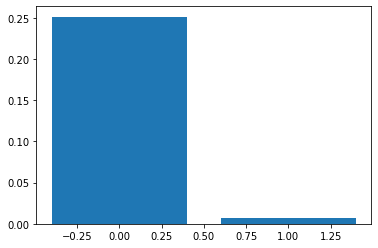

In [91]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [92]:
import pandas as pd
import numpy as np
df_origianl = pd.DataFrame(X)
df_origianl[2]  = y
df_origianl.columns = ['x1','x2','y']
df_origianl


,x1,x2,y
0,0.863411,-0.912354,1
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,3.620555,-0.098876,1
...,...,...,...
995,2.143260,2.223026,1
996,1.425043,-0.236500,1
997,1.330195,3.721810,1
998,-1.010841,0.426339,0


In [93]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.974
e2 = temp['x2'].mean()*0.3*0.0255

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.223061,1.0
4996,1.425043,-0.236465,1.0
4997,1.330195,3.721845,1.0
4998,-1.010841,0.426374,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


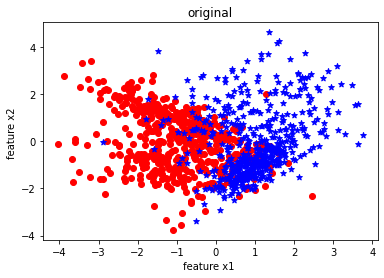

BESVM Accuracy (on training) = with x1 bounded error (30%*0.974),x2 with error (30%*0.0255) : 0.85025
BESVM Accuracy (on testing) = with x1 bounded error (30%*0.974),x2 with error (30%*0.0255) : 0.866


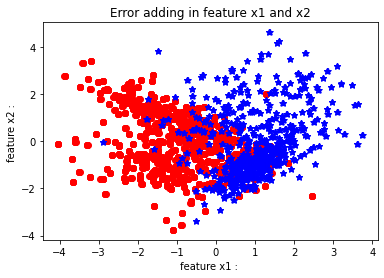

In [94]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.974),x2 with error (30%*0.0255) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (30%*0.974),x2 with error (30%*0.0255) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [95]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.0255
e2 = temp['x2'].mean()*0.3*0.974

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.224365,1.0
4996,1.425043,-0.235162,1.0
4997,1.330195,3.723148,1.0
4998,-1.010841,0.427678,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


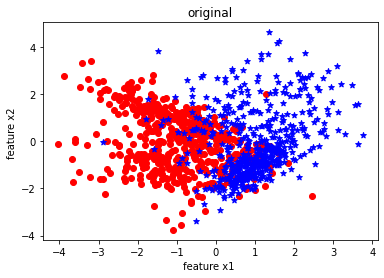

BESVM Accuracy (on training) = with x1 bounded error (30%*0.025),x2 with error (30%*0.974) : 0.85075
BESVM Accuracy (on testing) = with x1 bounded error (30%*0.025),x2 with error (30%*0.974) : 0.867


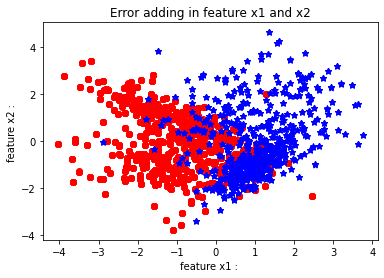

In [96]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.025),x2 with error (30%*0.974) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (30%*0.025),x2 with error (30%*0.974) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


Decision Tree importance

In [97]:
from sklearn.datasets import make_classification  
from sklearn.tree import DecisionTreeClassifier  
from matplotlib import pyplot  

In [98]:
X

array([[ 0.86341137, -0.91235445],
       [-0.53099717,  0.90118241],
       [ 0.98277596, -1.59111159],
       ...,
       [ 1.33019532,  3.72180951],
       [-1.01084076,  0.42633933],
       [-1.00873243,  1.24540194]])

Feature: 0, Score: 0.74736
Feature: 1, Score: 0.25264
0.7473603296814869
0.25263967031851314


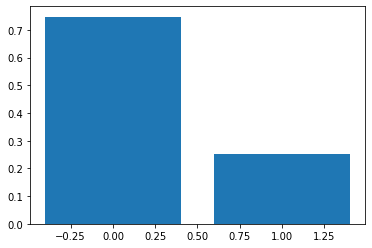

In [99]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [100]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.75
e2 = temp['x2'].mean()*0.3*0.249

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.223369,1.0
4996,1.425043,-0.236158,1.0
4997,1.330195,3.722152,1.0
4998,-1.010841,0.426682,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


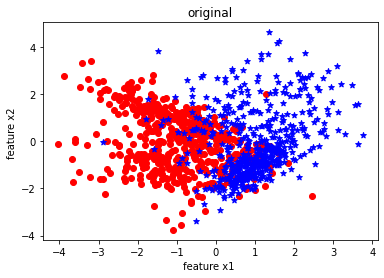

BESVM Accuracy (on training) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : 0.85025
BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : 0.866


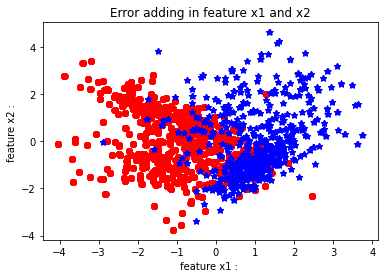

In [101]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [102]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.249
e2 = temp['x2'].mean()*0.3*0.75

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.224057,1.0
4996,1.425043,-0.235469,1.0
4997,1.330195,3.722840,1.0
4998,-1.010841,0.427370,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


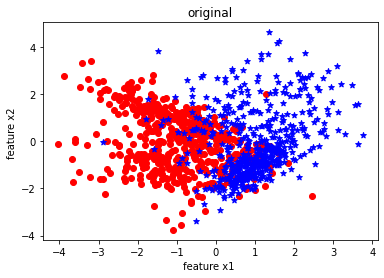

BESVM Accuracy (on training) = with x1 bounded error (30%*0.249),x2 with error (30%*0.75) : 0.8505
BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.249),x2 with error (by decision tree 30%*0.75) : 0.867


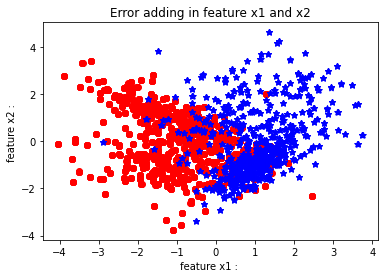

In [103]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.249),x2 with error (30%*0.75) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.249),x2 with error (by decision tree 30%*0.75) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


permutation importance

Feature: 0, Score: 0.39260
Feature: 1, Score: 0.07140
0.8461206896551724
0.15387931034482763


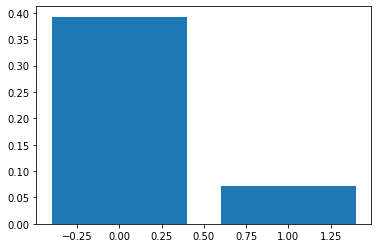

In [104]:
# permutation feature importance with knn for classification 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.inspection import permutation_importance  
# define dataset 
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)  
# define the model 
model = KNeighborsClassifier()  
# fit the model 
model.fit(X, y)  
# perform permutation importance 
results = permutation_importance(model, X, y, scoring='accuracy')  
# get importance 
importance = results.importances_mean  
# summarize feature importance 

acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [105]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.835
e2 = temp['x2'].mean()*0.3*0.164

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.223252,1.0
4996,1.425043,-0.236275,1.0
4997,1.330195,3.722035,1.0
4998,-1.010841,0.426565,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


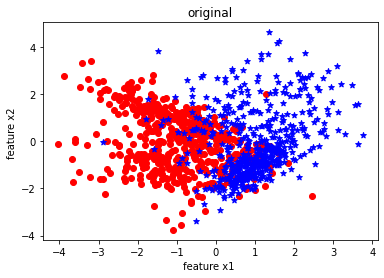

BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : 0.85025
BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : 0.866


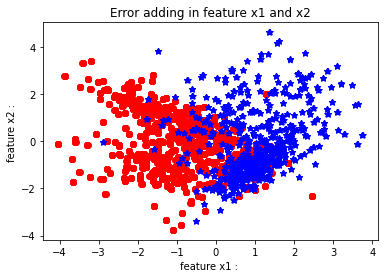

In [106]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [107]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.164
e2 = temp['x2'].mean()*0.3*0.835

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4995,2.143260,2.224174,1.0
4996,1.425043,-0.235353,1.0
4997,1.330195,3.722957,1.0
4998,-1.010841,0.427487,0.0


Original Accuracy (on training) = 0.855
Original Accuracy (on testing) = 0.855


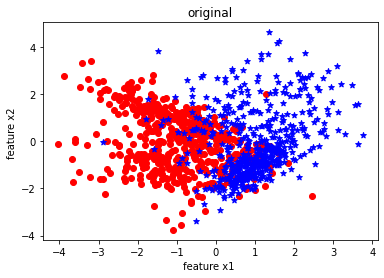

BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : 0.85075
BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : 0.867


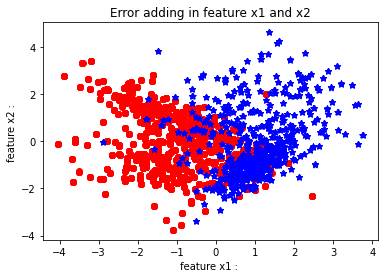

In [108]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()
